UN DATASET ASSIGNMENT QUESTIONS (WK1 - Python/Pandas):
Note:  Questions are listed as markdown comments before each bit of code below.

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
## Q5: Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
## Take a look at the first 6 rows.

In [3]:
## used nrows to filter out rows past a certain count of rows
## then checked tail to make sure which row the data ended on
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows = 6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [4]:
gdp_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [5]:
## Q6: Repeat for the internet use dataset. Call this DataFrame internet_df.
## Take a look at the first six rows.

In [6]:
## used nrows to filter out rows past a certain count of rows
## then checked tail to make sure which row the data ended on
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [8]:
## Q7: Look at the shape of each dataframe - how many rows, how many columns.
## A7: GDP has (6731, 4), Internet has (4495,4)

In [9]:
gdp_df.shape

(6729, 4)

In [10]:
internet_df.shape

(4495, 4)

In [11]:
## Q8: Take a look at the data types for the columns in each table.

In [12]:
## object is python's way of saying string
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [13]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [14]:
## can also do this:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
Country or Area    6729 non-null object
Year               6729 non-null int64
Value              6729 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [15]:
## Q9: Take a look at the last 10 rows of each dataset in turn.

In [16]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [17]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [18]:
## Q10: Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.
## to see if there were not null values in Value Footnotes, use this:
gdp_df[gdp_df['Value Footnotes'].notnull()]

,Country or Area,Year,Value,Value Footnotes
5787,Sudan,2011,3643.092161,2.0


In [19]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [20]:
## axis = 1 means you're pointing to a column, axis = 0 would be a row, so 
# gdp_df.drop(6727,. axis = 0).tail()
## another equally correct method is gdp_df = gdp_df.drop(columns = ''Value Footnotes'])
internet_df = internet_df.drop(['Value Footnotes'], axis = 1)
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [21]:
## Q11: Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [22]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [23]:
## Q12: Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [24]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [25]:
## Q13: Merge the two DataFrames to one. Merge all rows from each of the two DataFrames.
## Call the new DataFrame gdp_and_internet_use.

In [26]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')

In [27]:
## Q14: Look at the first five rows of your new data frame to confirm it merged correctly.

In [28]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [29]:
## Q15: Look at the last five rows to make sure the data is clean and as expected.

In [30]:
gdp_and_internet_use.tail(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7699,Virgin Islands (U.S.),1998,NaN,9.245220
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [31]:
## Q16: Subset the combined data frame to keep only the data for 2004, 2009, and 2014. 
## Check that this happened correctly.

In [32]:
year_list = ['2004', '2009', '2014']
gdp_and_internet_use_df = gdp_and_internet_use.query("Year in @year_list")
print(gdp_and_internet_use_df.shape)
gdp_and_internet_use_df.head()

(835, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [33]:
##nicole used:
## gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use[“Year”].isin([2004, 2009, 2014])]

## john used:
##subset_4_9_14 = gdp_and_internet_use[(gdp_and_internet_use.Year == 2004)|
##                                     (gdp_and_internet_use.Year==2009)|
##                                     (gdp_and_internet_use.Year==2014)]
## the pipe | is the code for OR and & is code for AND

## diego used:
## subset_04_09_14 = gdp_and_internet_use.query('Year == (2004,2009,2014)')

## could check 
gdp_and_internet_use_df['Year'].unique()

array([2014, 2009, 2004], dtype=int64)

In [34]:
gdp_and_internet_use_df.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510
7693,Virgin Islands (U.S.),2004,NaN,27.377009


In [35]:
## Q17: Create three new data frames, one for 2004, one for 2009, and one for 2014. 
## Give them meaningful names that aren't too long.

## diego's version, much shorter, uses query instead of mask, could also use loc or iloc functions
## gdp_int_04 = subset_04_09_14.query('Year == 2004')
## gdp_int_09 = subset_04_09_14.query('Year == 2009')
## gdp_int_14 = subset_04_09_14.query('Year == 2014')

In [36]:
mask_2004 = gdp_and_internet_use_df['Year'] == 2004
mask_2004_df = gdp_and_internet_use_df [mask_2004]
print(mask_2004_df.head())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
14           Afghanistan  2004     1025.208245            0.105809
31               Albania  2004     7001.054082            2.420388
60               Algeria  2004    11845.170512            4.634475
89                Angola  2004     4604.657044            0.464815
118  Antigua and Barbuda  2004    21161.123532           24.266544


In [37]:
mask_2009 = gdp_and_internet_use_df['Year'] == 2009
mask_2009_df = gdp_and_internet_use_df [mask_2009]
print(mask_2009_df.head())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
9            Afghanistan  2009     1502.354073                3.55
26               Albania  2009     9525.377979               41.20
55               Algeria  2009    12697.690780               11.23
84                Angola  2009     6292.534856                6.00
113  Antigua and Barbuda  2009    22568.626530               42.00


In [38]:
mask_2014 = gdp_and_internet_use_df['Year'] == 2014
mask_2014_df = gdp_and_internet_use_df [mask_2014]
print(mask_2014_df.head())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
4            Afghanistan  2014     1795.735834                6.39
21               Albania  2014    10700.993216               60.10
50               Algeria  2014    13557.769757               18.09
79                Angola  2014     6813.052106               21.26
108  Antigua and Barbuda  2014    20440.540555               64.00


In [39]:
## Q18: Which country had the highest percentage of internet users in 2014? What was the percentage?
## (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).
## A18: Iceland, 98.16%

In [40]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

## Media's version:
## max_internet_2014 = [max(gdp_and_internet_2014.Internet_User_Pct)]
## gdp_and_internet_2014.query('Internet_User_Pct in @max_internet_2014')

## Lori's version:
## y14_gdp_internet.loc[y14_gdp_internet['Internet_Users_Pct'] == y14_gdp_internet['Internet_Users_Pct'].max()]

## Ari's version, which pulls row info out and turns it into a series
## gdp_internet_use_2014.loc[gdp_internet_use_2014['Internet_Users_Pct'].idxmax()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


In [41]:
## Q19: Which country had the lowest percentage of internet users in 2014? What was the percentage?
## A19: Dem.People's Rep. of Korea, 0%

## for the min/max version, 
## y14_gdp_internet.loc[y14_gdp_internet['Internet_Users_Pct'] == y14_gdp_internet['Internet_Users_Pct'].min()]

In [42]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


In [43]:
## Q20: Repeat for 2004 and 2009.
## A20: 2004 -- Highest is Sweden at 83.89%; lowest is Dem. People's Rep. of Korea, 0%
## A20: 2009 -- Highest is Iceland at 93%; lowest is Dem. People's Rep. of Korea, 0%

In [44]:
mask_2004_df.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89


In [45]:
mask_2004_df.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


In [46]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.0


In [47]:
mask_2009_df.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


In [48]:
## Q21:  Which country had the highest gdp per capita in 2014? What was the gdp per capita?
## A21:  Macao SAR, China at $130,439.11 (rounded)

In [83]:
mask_2014_df.sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


In [51]:
## Q22: Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
## A22: Central African Republic at $672.68 (rounded)

In [52]:
mask_2014_df.sort_values(by = 'GDP_Per_Capita', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


In [53]:
## Q23: Create some scatterplots: 
##    a. 2004 Percent Using the Internet vs GDP Per Capita 
##    b. 2009 Percent Using the Internet vs GDP Per Capita 
##    c. 2014 Percent Using the Internet vs GDP Per Capita

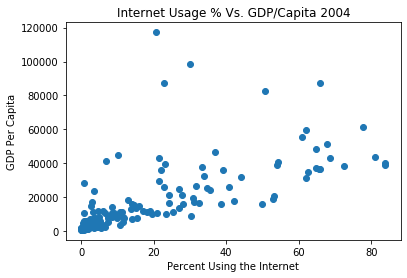

In [54]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2004_df)
plt.title('Internet Usage % Vs. GDP/Capita 2004')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

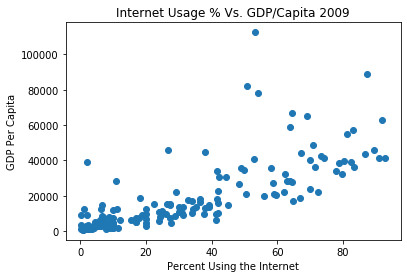

In [55]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2009_df)
plt.title('Internet Usage % Vs. GDP/Capita 2009')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

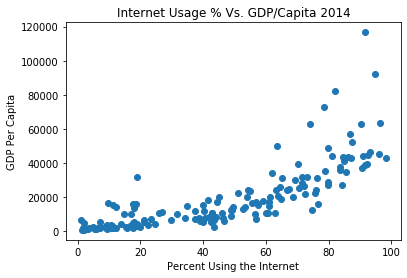

In [56]:
plt.scatter(y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', data = mask_2014_df)
plt.title('Internet Usage % Vs. GDP/Capita 2014')
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Using the Internet');

In [57]:
## Q24: Are there differences across years? What do the plots tell you about any relationship between these two variables? 
## Enter your observations as a markdown cell.

### A24: The trend is flattening and is more grouped, which tells me that more countries have a high percentage of internet usage, regardless of GDP/capita.  The curve is steeper at the high usage end showing a wide gap between countries with extremely high and low GDPs.

In [58]:
## Q25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?

### A25: Yes

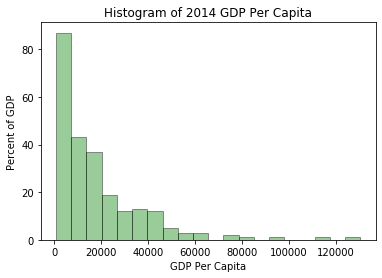

In [84]:
# matplotlib histogram
# plt.hist(mask_2014_df['GDP_Per_Capita'], color = 'green', edgecolor = 'black', bins= 15))

# seaborn histogram
sns.distplot(mask_2014_df['GDP_Per_Capita'], hist=True, kde=False, 
             bins=int(10000/500), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of 2014 GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Percent of GDP');

In [60]:
## Q26: Look at the distribution of Internet Use for 2014. Is it unimodal?

## Mahesh's version:
## plt.hist(gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()]['GDP_Per_Capita'], bins = 100);

## Antonio's version using dataframe to call histogram:
##the2004_df.hist(column = 'Internet_Users_Pct', bins = 15)

### A26: No.

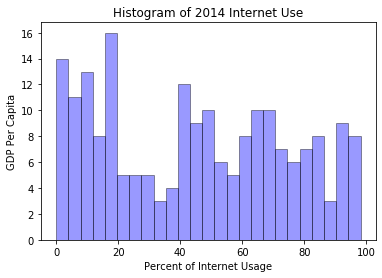

In [61]:
# matplotlib histogram
# plt.hist(mask_2014_df['Internet_Users_Pct'], color = 'blue', edgecolor = 'black', bins=15))

# seaborn histogram
sns.distplot(mask_2014_df['Internet_Users_Pct'], hist=True, kde=False, 
             bins=25, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of 2014 Internet Use')
plt.xlabel('Percent of Internet Usage')
plt.ylabel('GDP Per Capita');

In [62]:
## Q27: What are the top 5 countries in terms of internet use in 2014?
## NOTE: I used same query from Q18, limiting to 5 using head function

## Sophia's version:
##top_5_internet_2014 = gdp_internet_2014.sort_values(by='Internet_Users_Pct', ascending = False).Country[0:5].to_list()
## print(top_5_internet_2014)

In [63]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


In [64]:
## Q28: Create a data frame called top_5_internet from the combined data frame that has all three years
## for these 5 countries. You should have 15 rows. Check that this is true.(TRICKY QUESTION PER MARY) 
## NOTE: used similar query to Q16 to limit the countries

## Teresa's version:
## top5 = top_5_internet_2014.Country
## top5_list = list(top5)
## top_5_internet = gdp_and_internet_use_subset[gdp_and_internet_use_subset.Country.isin(top5_list)]
## top_5_internet.shape

## Diego's version:
## top_5_internet = subset_04_09_14[subset_04_09_14.Country.isin(gdp_int_14.sort_values('Internet_Users_Pct', ascending = False).Country.head(5))]
## top_5_internet


In [65]:
country_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet_df = gdp_and_internet_use_df.query("Country in @country_list").reset_index(drop=True)
## note:  the sort didn't work until i assigned the df back to itself as a variable
## don't use inplace=True because that's going away
top_5_internet_df = top_5_internet_df.sort_values(['Country', 'Year'], ascending = True)
top_5_internet_df.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
13,Andorra,2004,NaN,26.837954
12,Andorra,2009,NaN,78.530000
11,Andorra,2014,NaN,95.900000
1,Bermuda,2004,55452.638880,60.990867
0,Bermuda,2009,57151.919132,83.250000
14,Bermuda,2014,NaN,96.800000
4,Denmark,2004,43670.446201,80.930000
3,Denmark,2009,43382.615688,86.840000
2,Denmark,2014,45057.083449,95.990000
7,Iceland,2004,38893.378798,83.880000


In [66]:
## Q29: Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries
## (those with the highest reported internet use in 2014). 
## Q29a. Which country had the greatest growth between 2004 and 2014? 
## A29a: Andorra
## Q29b. Is there a plotting issue with Bermuda? Can you fix it?
## A29b: Yes, added inplace = True to top_5_internet_df sort above to fix NaNs

## Mahesh's version (not sure how to break this into multiple lines appropriately yet):
## bottom_5_gdp = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()].sort_values(by = 'GDP_Per_Capita', ascending = False).tail()['Country'].tolist()

## gdp_and_internet_bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(bottom_5_gdp))&
##                                                   (gdp_and_internet_use['Year']>= 2004)&
##                                                  (gdp_and_internet_use['Year']<=2014)].sort_values(['Country', 'Year'])

## g = sns.FacetGrid(gdp_and_internet_bottom_5_gdp, col = 'Country')
## g.map(plt.plot, 'Year', 'GDP_Per_Capita');

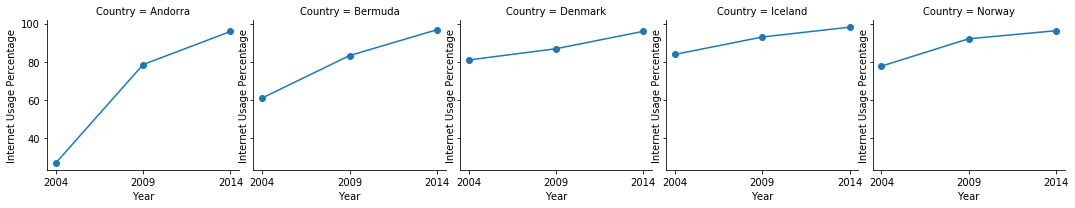

In [67]:
top_5 = sns.FacetGrid(top_5_internet_df, col = 'Country')
top_5 = top_5.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = 'o')
top_5.set(xticks = [2004, 2009, 2014], ylabel = 'Internet Usage Percentage')

In [68]:
## Q30: Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage.
##Which country has consistently had the least internet use?
## A30:  Dem. People's Rep. of Korea (0% reported all 3 years)

In [69]:
mask_2014_df.sort_values(by = 'Internet_Users_Pct', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


In [70]:
##NOTE: Korea has to have dbl quotes because of spaces and apostrophe in country name
country_list = ["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
bottom_5_internet_df = gdp_and_internet_use_df.query("Country in @country_list").reset_index(drop=True)
## note:  the sort didn't work until i assigned the df back to itself as a variable
## don't use inplace=True because that's going away
bottom_5_internet_df = bottom_5_internet_df.sort_values(['Country', 'Year'], ascending = True)
bottom_5_internet_df.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Burundi,2004,708.833720,0.349060
1,Burundi,2009,721.063140,0.900000
0,Burundi,2014,768.469837,1.380000
10,Dem. People's Rep. of Korea,2004,NaN,0.000000
9,Dem. People's Rep. of Korea,2009,NaN,0.000000
8,Dem. People's Rep. of Korea,2014,NaN,0.000000
4,Eritrea,2004,2317.349879,NaN
3,Eritrea,2009,1950.533339,0.540000
11,Eritrea,2014,NaN,0.990000
14,Somalia,2004,NaN,1.053455


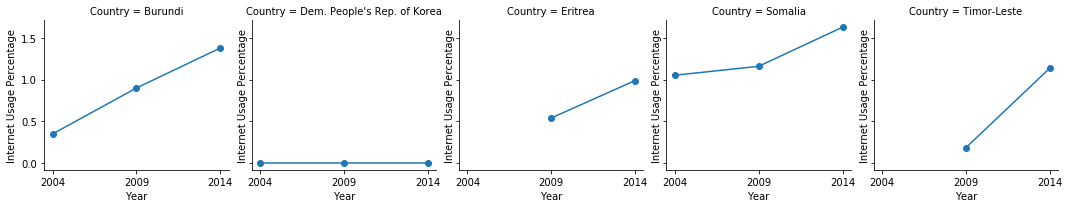

In [71]:
bottom_5 = sns.FacetGrid(bottom_5_internet_df, col = 'Country')
bottom_5 = bottom_5.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = 'o')
bottom_5.set(xticks = [2004, 2009, 2014], ylabel = 'Internet Usage Percentage')

In [72]:
## Q31a: Find the top 5 countries for 2014 in terms of GDP per capita

In [73]:
mask_2014_df.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [74]:
##NOTE: Macao has to have dbl quotes because of space in country name
country_list = ["Macao SAR, China", 'Qatar', 'Luxembourg', 'Singapore', 'Brunei']
top_5_gdp_df = gdp_and_internet_use_df.query("Country in @country_list").reset_index(drop=True)
## note:  the sort didn't work until i assigned the df back to itself as a variable
## don't use inplace=True because that's going away
top_5_gdp_df = top_5_gdp_df.sort_values(['Country', 'Year'], ascending = True)
top_5_gdp_df.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Brunei,2004,83963.238066,NaN
1,Brunei,2009,79485.001581,NaN
0,Brunei,2014,76448.593329,NaN
5,Luxembourg,2004,87209.819367,65.880000
4,Luxembourg,2009,89098.734264,87.310000
3,Luxembourg,2014,92349.186429,94.670000
8,"Macao SAR, China",2004,60791.976853,NaN
7,"Macao SAR, China",2009,79955.986107,NaN
6,"Macao SAR, China",2014,130439.106674,NaN
11,Qatar,2004,117271.427067,20.701648


In [75]:
## Q31b: Create a dataframe to look at 10-year trends (2004-2014, so we'll have 2004, 2009, 2014 in terms of trends)
## in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

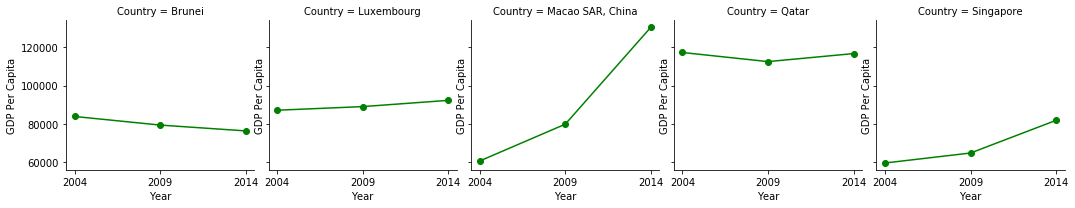

In [76]:
top_5_gdp = sns.FacetGrid(top_5_gdp_df, col = 'Country')
top_5_gdp = top_5_gdp.map(plt.plot, 'Year', 'GDP_Per_Capita', marker = 'o', color="g")
top_5_gdp.set(xticks = [2004, 2009, 2014], ylabel = 'GDP Per Capita')

In [77]:
## Q32: Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [78]:
mask_2014_df.sort_values(by = 'GDP_Per_Capita', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


In [79]:
##NOTE: Central African Republic and Congo have to have dbl quotes because of spaces in country name
country_list = ["Central African Republic", 'Burundi', "Dem. Rep. Congo", 'Niger', 'Malawi']
bottom_5_gdp_df = gdp_and_internet_use_df.query("Country in @country_list").reset_index(drop=True)
## note:  the sort didn't work until i assigned the df back to itself as a variable
## don't use inplace=True because that's going away
bottom_5_gdp_df = bottom_5_gdp_df.sort_values(['Country', 'Year'], ascending = True)
bottom_5_gdp_df.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Burundi,2004,708.833720,0.349060
1,Burundi,2009,721.063140,0.900000
0,Burundi,2014,768.469837,1.380000
5,Central African Republic,2004,848.689032,NaN
4,Central African Republic,2009,949.551325,NaN
3,Central African Republic,2014,672.681648,NaN
8,Dem. Rep. Congo,2004,577.483297,NaN
7,Dem. Rep. Congo,2009,636.875743,NaN
6,Dem. Rep. Congo,2014,784.872656,NaN
11,Malawi,2004,862.392437,0.347505


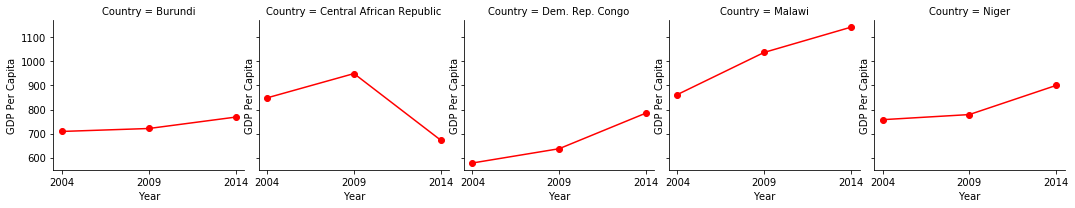

In [80]:
bottom_5_gdp = sns.FacetGrid(bottom_5_gdp_df, col = 'Country')
bottom_5_gdp = bottom_5_gdp.map(plt.plot, 'Year', 'GDP_Per_Capita', marker = 'o', color="r")
bottom_5_gdp.set(xticks = [2004, 2009, 2014], ylabel = 'GDP Per Capita')

In [81]:
## Q33: Is there anything surprising or unusual in any of these plots? 
## Searching on the internet, can you find any possible explanations for unusual findings?

### A33:  Central African Republic is the only country whose GDP decreased in the bottom 5 list.

### Central African Republic is the only country whose GDP decreased in the bottom 5 list. Not sure if data about CAR is correct; according to https://countryeconomy.com/gdp/central-african-republic, it shows fairly steady increase, with a 32% drop in 2013.  This seems related to a coup in 2003 over a brutal military regime.  The CAR had a fairly stable economy until the president was overthrown by a mostly Muslim rebel group that led to UN peacekeepers being deployed.


###  Also, Macao's GDP soared between 2009 and 2014.  

### According to https://www.sciencedirect.com/science/article/pii/S0264275117308995, Macao was returned to China in 1998 and began to increase its casino gaming industry to 60% of GDP.  By 2016, it was doing 7x Las Vegas levels.

In [82]:
## Bonus exercise:
## Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

### I looked at World Tourism Data.

### The World Tourism Organization's Compendium of Tourism Statistics and Yearbook of Tourism Statistics provide comprehensive information on international tourism worldwide and offer a selection of the latest available statistics on "arrivals of non-resident tourists/visitors" and "tourism expenditure".

### Last update in UNdata: 2020/01/17
### Next update in UNdata: 2021/01/01